In [1]:
import numpy as np
import pandas as pd
import nltk
import json
import re
import csv
from tqdm import tqdm
pd.set_option('display.max_colwidth', 300)

data = []

with open("booksummaries.txt", 'r') as f:
    reader = csv.reader(f, dialect='excel-tab')
    for row in tqdm(reader):
        data.append(row)

16559it [00:00, 19490.92it/s]


In [2]:
book_index = []
book_id = []
book_author = []
book_name = []
summary = []
genre = []
a = 1
for i in tqdm(data):
    book_index.append(a)
    a = a+1
    book_id.append(i[0])
    book_name.append(i[2])
    book_author.append(i[3])
    genre.append(i[5])
    summary.append(i[6])

df = pd.DataFrame({'Index': book_index, 'ID': book_id, 'BookTitle': book_name, 'Author': book_author,
                       'Genre': genre, 'Summary': summary})
df.head()

100%|██████████| 16559/16559 [00:00<00:00, 734522.19it/s]


,Index,ID,BookTitle,Author,Genre,Summary
0,1,620,Animal Farm,George Orwell,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"": ""Satire"", ""/m/0dwly"": ""Children's literature"", ""/m/014dfn"": ""Speculative fiction"", ""/m/02xlf"": ""Fiction""}","Old Major, the old boar on the Manor Farm, calls the animals on the farm for a meeting, where he compares the humans to parasites and teaches the animals a revolutionary song, 'Beasts of England'. When Major dies, two young pigs, Snowball and Napoleon, assume command and turn his dream into a p..."
1,2,843,A Clockwork Orange,Anthony Burgess,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""Novella"", ""/m/014dfn"": ""Speculative fiction"", ""/m/0c082"": ""Utopian and dystopian fiction"", ""/m/06nbt"": ""Satire"", ""/m/02xlf"": ""Fiction""}","Alex, a teenager living in near-future England, leads his gang on nightly orgies of opportunistic, random ""ultra-violence."" Alex's friends (""droogs"" in the novel's Anglo-Russian slang, Nadsat) are: Dim, a slow-witted bruiser who is the gang's muscle; Georgie, an ambitious second-in-command; and..."
2,3,986,The Plague,Albert Camus,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fiction"", ""/m/0pym5"": ""Absurdist fiction"", ""/m/05hgj"": ""Novel""}","The text of The Plague is divided into five parts. In the town of Oran, thousands of rats, initially unnoticed by the populace, begin to die in the streets. A hysteria develops soon afterward, causing the local newspapers to report the incident. Authorities responding to public pressure order t..."
3,4,1756,An Enquiry Concerning Human Understanding,David Hume,,"The argument of the Enquiry proceeds by a series of incremental steps, separated into chapters which logically succeed one another. After expounding his epistemology, Hume explains how to apply his principles to specific topics. In the first section of the Enquiry, Hume provides a rough introdu..."
4,5,2080,A Fire Upon the Deep,Vernor Vinge,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90"": ""Science Fiction"", ""/m/014dfn"": ""Speculative fiction"", ""/m/01hmnh"": ""Fantasy"", ""/m/02xlf"": ""Fiction""}","The novel posits that space around the Milky Way is divided into concentric layers called Zones, each being constrained by different laws of physics and each allowing for different degrees of biological and technological advancement. The innermost, the ""Unthinking Depths"", surrounds the galacti..."


In [8]:
def clean_data(df):
  df.isna().sum()
  df = df.drop(df[df['Genre'] == ''].index)
  df = df.drop(df[df['Summary'] == ''].index)
  genres_cleaned = []
  for i in df['Genre']:
      genres_cleaned.append(list(json.loads(i).values()))
  df['Genre'] = genres_cleaned
  
  def clean_summary(text):
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = ' '.join(text.split())
    text = text.lower()
    return text

  df['clean_summary'] = df['Summary'].apply(lambda x: clean_summary(x))
  return df

df = clean_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12841 entries, 0 to 16558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          12841 non-null  int64 
 1   ID             12841 non-null  object
 2   BookTitle      12841 non-null  object
 3   Author         12841 non-null  object
 4   Genre          12841 non-null  object
 5   Summary        12841 non-null  object
 6   clean_summary  12841 non-null  object
dtypes: int64(1), object(6)
memory usage: 802.6+ KB


In [3]:
def load_data():
  data = []
  with open("booksummaries.txt", 'r') as f:
    reader = csv.reader(f, dialect='excel-tab')
    for row in tqdm(reader):
      data.append(row)

  book_index = []
  book_id = []
  book_author = []
  book_name = []
  summary = []
  genre = []
  a = 1
  for i in tqdm(data):
      book_index.append(a)
      a = a+1
      book_id.append(i[0])
      book_name.append(i[2])
      book_author.append(i[3])
      genre.append(i[5])
      summary.append(i[6])
  df = pd.DataFrame({'Index': book_index, 'ID': book_id, 'BookTitle': book_name, 'Author': book_author,
                        'Genre': genre, 'Summary': summary})
  def clean_data(df):
    df.isna().sum()
    df = df.drop(df[df['Genre'] == ''].index)
    df = df.drop(df[df['Summary'] == ''].index)
    genres_cleaned = []
    for i in df['Genre']:
        genres_cleaned.append(list(json.loads(i).values()))
    df['Genre'] = genres_cleaned
    
    def clean_summary(text):
      text = re.sub("\'", "", text)
      text = re.sub("[^a-zA-Z]"," ",text)
      text = ' '.join(text.split())
      text = text.lower()
      return text
    df['clean_summary'] = df['Summary'].apply(lambda x: clean_summary(x))
    return df
  df = clean_data(df)
  return df

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12841 entries, 0 to 16558
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Index          12841 non-null  int64 
 1   ID             12841 non-null  object
 2   BookTitle      12841 non-null  object
 3   Author         12841 non-null  object
 4   Genre          12841 non-null  object
 5   Summary        12841 non-null  object
 6   clean_summary  12841 non-null  object
dtypes: int64(1), object(6)
memory usage: 802.6+ KB


/tmp/ipykernel_145905/2218254423.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['doc_len'], hist=True, kde=True, color='b', label='doc len')


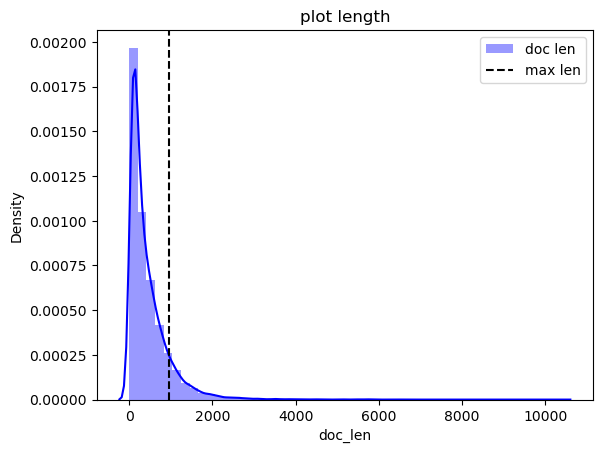

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df['doc_len'] = df['clean_summary'].apply(lambda words: len(words.split()))
max_seq_len = np.round(df['doc_len'].mean() + df['doc_len'].std()).astype(int)
sns.distplot(df['doc_len'], hist=True, kde=True, color='b', label='doc len')
plt.axvline(x=max_seq_len, color='k', linestyle='--', label='max len')
plt.title('plot length'); plt.legend()
plt.show()